<a href="https://colab.research.google.com/github/KMG5498/24-/blob/main/24%EC%97%AC%EB%A6%84_%EB%9E%A9%EC%9D%B8%ED%84%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Let's make a simulator")

Let's make a simulator


In [1]:
# 구글 드라이브 마운트 하는 부분
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# @title import 부분
import numpy as np
import copy
import pickle
import os
from pathlib import Path
import random

# from get_random_problems import *
# from vns_problem import *

In [3]:
# @title 함수 정의 부분 - 데이터 생성
def make_train_data_dict(env_params, num_prob):
    current_path = Path(os.getcwd())
    params = copy.deepcopy(env_params)
    np.random.seed(1)
    for path in range(num_prob):
        problems_dict = generate_data_dict(env_params)
        if not os.path.exists("data_train/"+ str(params['n_m']) + 'x' + str(params['n_j']) + 'x' + str(params['num_families']) + "/"):
            os.makedirs("data_train/"+ str(params['n_m']) + 'x' + str(params['n_j']) + 'x' + str(params['num_families'])+ "/")
        with open(str(current_path) + "/data_train/" + str(params['n_m']) + 'x' + str(params['n_j']) + 'x' + str(params['num_families'])+ "/" + str(params['n_m']) + 'x' + str(params['n_j']) + 'x' + str(params['num_families']) + "_" + str(path) + '.pickle', 'wb') as f:
            pickle.dump(problems_dict, f, pickle.HIGHEST_PROTOCOL)

def make_eval_data_dict(env_params, num_prob):
    current_path = Path(os.getcwd())
    params = copy.deepcopy(env_params)
    np.random.seed(1)
    for path in range(num_prob):
        problems_dict = generate_data_dict(env_params)
        if not os.path.exists("data_eval"):
            os.makedirs("data_eval")
        with open(str(current_path) + "/data_eval/" + str(params['n_m']) + 'x' + str(params['n_j']) + 'x' + str(params['num_families']) + "_" + str(path) + '.pickle', 'wb') as f:
            pickle.dump(problems_dict, f, pickle.HIGHEST_PROTOCOL)

def generate_data_dict(env_params):
  #machine-job 당 process time
  machine_processing_times = [[] for _ in range(env_params['n_m'])]
  for job_index in range(env_params['n_j']):
    for machine_index in range(env_params['n_m']):
        machine_processing_times[machine_index].append(random.randint(env_params['low'], env_params['high']))

  #ready time (= 이전 코드의 release time)
  ready_times = [random.randint(0,  100) for _ in range(env_params['n_j'])]

  # due date
  due_dates = [random.randint(env_params['due_low'], env_params['due_high']) for _ in range(env_params['n_j'])]

  # family
  group = [[] for _ in range(env_params['num_families'])]

  for job_index in range(env_params['n_j']):
    family = random.choice(range(env_params['num_families']))
    group[family].append(job_index)
  family_group = {}
  for i, family in enumerate(group):
    for job in family:
      family_group[job] = i

  # job requiring resource
  required_resource = []
  for job_index in range(env_params['n_j']):
    resource = random.randint(0, env_params['num_resource_type']-1)
    required_resource.append(resource)

  # eligilbe machine set
  eligible_machines = [[] for _ in range(env_params['n_j'])]
  for job_index in range(env_params['n_j']):
    eligible_machine = random.sample(range(env_params['n_m']), 3)
    eligible_machines[job_index] = eligible_machine

  random_generate_data = {
      'machine_processing_times':machine_processing_times,
      'ready_times': ready_times,
      'due_dates': due_dates,
      'family_group': family_group,
      'eligible_machines': eligible_machines,
      'required_resource': required_resource,
      'n_j' : 100,
      'n_m' : 5,
      'low' : 5,
      'high' : 50,
      'due_low' : 5,
      'due_high' : 100,
      'num_families' : 6,
      'num_resource_type': 15
  }
  return random_generate_data

# def get_vns_data_dict(vns_params, num_prob):
#     params = copy.deepcopy(vns_params)
#     np.random.seed(1)
#     for path in range(num_prob):
#         problems_dict = vns(params)
#         with open("./data/vns/"+ str(path) + '.pickle', 'wb') as f:
#             pickle.dump(problems_dict, f, pickle.HIGHEST_PROTOCOL)

In [4]:
# @title 메인함수 부분 - 데이터 생성
if __name__ == '__main__':
    # parameters
    env_params = {
        'n_j' : 100,
        'n_m' : 5,
        'low' : 5,
        'high' : 50,
        'due_low' : 5,
        'due_high' : 100,
        'num_families' : 6,
        'num_resource_type': 15
    }

    vns_params = {
        'max_iter': 5,
        'k_max': 2,
    }


    make_train_data_dict(env_params, num_prob = 200)

problem_path = '/content/data_train/5x100x6/5x100x6_77.pickle'

with open(problem_path, 'rb') as fr:
    problem = pickle.load(fr)

In [ ]:
problem['machines_resource']
#print(problem['required_resource'])
print(problem['eligible_machines'])

[[2, 3], [1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4], [2, 3], [0, 1], [0, 2, 4], [1, 2, 3, 4], [0, 1], [2, 3], [0, 1, 3, 4], [1, 2, 3, 4], [2, 3], [1, 2, 3, 4], [1, 2, 3, 4], [0, 1, 3, 4], [0, 1, 3, 4], [0, 1, 3, 4], [0, 1, 3, 4], [0, 1, 3, 4], [2, 3], [1, 2, 3, 4], [1, 2, 3, 4], [0, 1, 3, 4], [0, 1, 3, 4], [2, 3], [0, 1, 3, 4], [0, 2, 4], [2, 3], [0, 1, 3, 4], [1, 2, 3, 4], [0, 1], [0, 1, 3, 4], [2, 3], [0, 2, 4], [2, 3], [0, 2, 4], [0, 1], [2, 3], [0, 1, 3, 4], [1, 2, 3, 4], [2, 3], [0, 1], [1, 2, 3, 4], [1, 2, 3, 4], [0, 1], [1, 2, 3, 4], [0, 1, 3, 4], [0, 1, 3, 4], [1, 2, 3, 4], [0, 1, 3, 4], [0, 1], [1, 2, 3, 4], [2, 3], [0, 1, 3, 4], [2, 3], [2, 3], [1, 2, 3, 4], [0, 1], [2, 3], [0, 1], [2, 3], [0, 1], [2, 3], [0, 2, 4], [2, 3], [0, 1], [1, 2, 3, 4], [1, 2, 3, 4], [2, 3], [2, 3], [0, 2, 4], [0, 2, 4], [2, 3], [1, 2, 3, 4], [1, 2, 3, 4], [0, 1], [1, 2, 3, 4], [0, 2, 4], [1, 2, 3, 4], [2, 3], [1, 2, 3, 4], [0, 1], [2, 3], [2, 3], [0, 1, 3, 4], [0, 1, 3, 4], [0, 2, 4], [0, 1], [0, 1, 3

In [ ]:
# 이제부터 시뮬레이터 구축
print("가보자 가보자")

가보자 가보자


12246
machine 0: 96 66 10 82 12 81 71 refill 47 88 93 68 refill 37 45 60 26 29 65 30 refill 
machine 1: 78 50 73 41 40 32 13 67 38 35 39 91 36 5 80 83 84 95 refill 55 86 3 
machine 2: 49 43 24 99 79 51 20 4 77 64 23 85 18 92 98 11 76 90 34 
machine 3: 15 1 58 22 70 33 94 21 89 8 25 2 14 19 61 57 97 48 75 59 refill 
machine 4: 54 87 46 62 63 44 9 27 72 6 56 69 0 52 17 28 7 31 53 16 42 74 


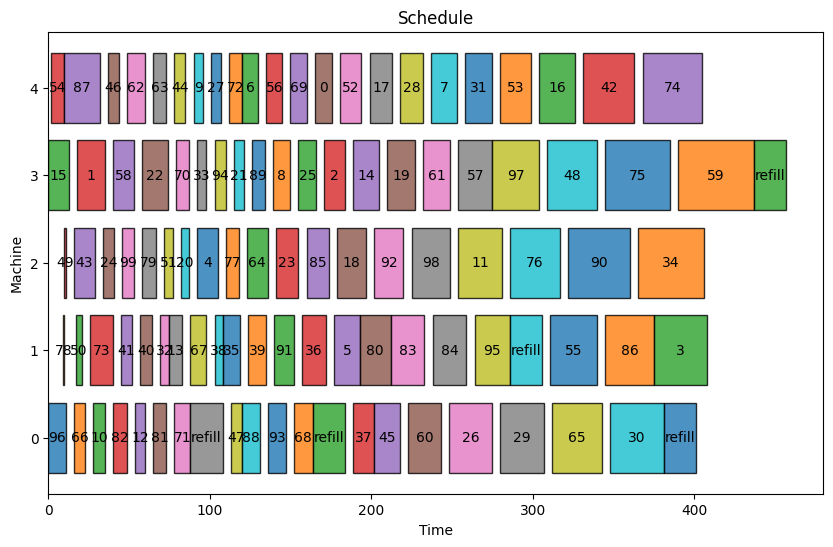

In [5]:
# @title 시뮬레이터 최종본 (GP 적용X)

import copy
import numpy as np
import math
#import dataloader
import random
import matplotlib.pyplot as plt

class Job():
    def __init__(self, job_id, prts=0, due=0, machines=None, ready_time=0, job_family=[], required_resource=0):
        # static info
        self.id = job_id
        self.prts = prts  # processing times
        self.due = due
        self.machines = machines # eligible machine set 이거 인덱스 리스트임 !
        # 내가 추가한거
        self.ready_time = ready_time
        self.job_family = job_family # 이거는 group number임 !
        self.required_resource = required_resource

        # dynamic info
        self.now_remain_t = 0 # remaining time

class Machine():
    def __init__(self, machine_id, machine_resource):
        # static info
        self.id = machine_id
        self.resource = machine_resource

        # dynamic info
        self.available_time = 0
        self.processing_job = None

class Simulator:
    def __init__(self, dataset = None):
        # input parameters
        self.num_job = dataset['n_j']# job 개수
        self.num_machine = dataset['n_m'] # machine 개수
        self.setup_time = 5
        self.refill_time = 20
        self.refill_condition = 10
        self.total_tardiness = 0

        # static info
        self.machine_info = dict()
        self.job_info = dict()

        # dynamic info
        self.sim_time = 0
        self.available_job_list = list()
        self.completed_job_list = list()
        self.done = False

        self.job_info, self.machine_info = self.load_data(dataset)

        # schedule info
        # 기존 self.schedule = dict.fromkeys(list(self.machine_info.keys()), list())
        self.schedule = {key: [] for key in self.machine_info.keys()}

    def load_data(self, dataset):
        """
        pickle 파일 및 environment parameter input에서 데이터 불러와서 job/machine class에 저장
        """
        # dataset이 env_params라고 가정
        # processing time을 job당으로 바꾸기
        processing_time_for_load_data = [[] for _ in range(self.num_job)]
        for i in range(self.num_job):
          for j in range(self.num_machine):
              processing_time_for_load_data[i].append(dataset['machine_processing_times'][j][i])
        # 룰 적용할때는 machine 당이 편할거 같아서 data generate 부분은 유지

        job_info = {i:Job(i, processing_time_for_load_data[i], dataset['due_dates'][i], dataset['eligible_machines'][i], dataset['ready_times'][i], dataset['family_group'][i], dataset['required_resource'][i]) for i in range(self.num_job) }
        machine_info = {j:Machine(j, j*50+50) for j in range(self.num_machine) }

        return job_info, machine_info

    def reset(self):
        self.sim_time = 0
        for_reset = []
        for i in range(self.num_job):
          if self.job_info[i].ready_time == 0:
            for_reset.append(i)
        self.available_job_list = for_reset
        # ready time 0인 job들만 저장


    def get_available_job(self, available_machines):
        # ready time이 self.sim_time 이하인 job들만 가져오기
        for_available_job = []
        for i in range(self.num_job):
          if self.job_info[i].ready_time <= self.sim_time and self.job_info[i] not in self.completed_job_list and self.job_info[i].now_remain_t == 0:
              jj = 0
              for j in available_machines:
                if j.id in self.job_info[i].machines and j.resource >= self.job_info[i].required_resource:
                    jj += 1
              if jj > 0:
                for_available_job.append(self.job_info[i])
        self.available_job_list = for_available_job
        return self.available_job_list


    def get_next_time_step(self):
        """
        의사결정 가능한 다음 time step 구하기
        """
        # differnece인거 인지!!
        next_job_time = min([job.now_remain_t for job in self.job_info.values() if job.now_remain_t > 0])
        next_machine_time = min([machine.available_time for machine in self.machine_info.values() if machine.available_time >= self.sim_time])
        next_machine_time -= self.sim_time
        return min(next_job_time, next_machine_time)


    def step(self, action):
        """
        시뮬레이터 및 environment 정보를 실질적으로 업데이트해 주는 함수
        action: 내가 테스트하고자 하는 rule에 따라 결정 (SPT, LPT, EDD, FIFO, GP, RL, ...)
        """
        # 얘 액션 완성하고 schedule 부분수정
        job, machine = action
        setup_time = self.if_setup(job, machine)
        job.now_remain_t = job.prts[machine.id] + setup_time
        machine.available_time = machine.available_time + job.prts[machine.id] + setup_time
        tardiness = 0 if machine.available_time - job.due <= 0 else machine.available_time - job.due
        self.total_tardiness += tardiness
        machine.resource -= job.required_resource
        self.schedule[machine.id].append((job, self.sim_time + setup_time, machine.available_time))
        if machine.resource <= self.refill_condition:
          machine.resource = 50
          machine.available_time += self.refill_time
          self.schedule[machine.id].append((Job('refill'), self.sim_time + job.prts[machine.id] + setup_time, machine.available_time))


    def move_to_next_sim_t(self, passid):
        """
        시뮬레이터 time 및 job/machine의 dynamic info 업데이트
        """
        if passid == 0:
          time_diff = self.get_next_time_step()
        else:
          time_diff = 1
        self.sim_time += time_diff
        for job in list(self.job_info.values()):
            if job.now_remain_t > 0:
                job.now_remain_t -= time_diff # job remaining time 업데이트
                if job.now_remain_t == 0:
                    self.completed_job_list.append(job) # 완료된 job 업데이트


    def is_done(self):
        """
        return True if the simulation is done
        """
        # 수정할거 없을듯
        if len(self.completed_job_list) == self.num_job:
            print(self.total_tardiness)
            return True
        return False

    def plot_gantt_chart(self):
        """
        Gantt Chart를 출력하는 함수
        """
        fig, ax = plt.subplots(figsize=(10, 6))

        for machine_id, jobs in self.schedule.items():
            for job in jobs:
                job_id, start_time, end_time = job
                ax.barh(machine_id, end_time - start_time, left=start_time, edgecolor='black', align='center', alpha=0.8)
                ax.text(start_time + (end_time - start_time) / 2, machine_id, f'{job_id.id}', color='black', ha='center', va='center')

        ax.set_xlabel('Time')
        ax.set_ylabel('Machine')
        ax.set_title('Schedule')
        plt.show()

    def if_setup(self, job, machine):
        if len(self.schedule[machine.id])==0 or self.schedule[machine.id][-1][0].job_family == job.job_family:
          return 0
        else:
          return self.setup_time

def get_action(env, jobs, machines, method):
    """
    action selection
    """
    if method == 'SPT':  # shortest processing time
        job_index=0
        machine_index=0
        minimum_prts=10000
        for i in machines:
          for j in jobs:
            for jj in j.machines:
              if jj==i.id and j.prts[i.id] < minimum_prts and i.resource >= j.required_resource:
                job_index = j.id
                machine_index = i.id
                minimum_prts = j.prts[i.id]
        selected_job = env.job_info[job_index]
        selected_machine = env.machine_info[machine_index]
        selected_machine.processing_job = selected_job
    elif method == "FIFO":
        job_index=0
        machine_index=0
        minimum_ready_time=10000
        for j in jobs:
          if j.ready_time < minimum_ready_time:
              job_index = j.id
              machine_index = random.choice(list(set(j.machines)&set([machine.id for machine in machines if machine.resource >= j.required_resource])))
              minimum_ready_time = j.ready_time
        selected_job = env.job_info[job_index]
        selected_machine = env.machine_info[machine_index]
        selected_machine.processing_job = selected_job
    else:
        pass
    return selected_job, selected_machine


if __name__ == "__main__":
    data = problem
    sim = Simulator(data)
    while not sim.is_done():
        available_machines = [machine for machine in sim.machine_info.values() if machine.available_time <= sim.sim_time and machine.resource > 0] # machine.resource>0 이거 사실상 의미 없음 step에서 쓰자마자 10이하면 리필하니까
        available_jobs = sim.get_available_job(available_machines) # ready time, 종료 여부 등 고려하여 작업 가능한 job 가져오기
        if available_jobs != []:
          action = get_action(sim, available_jobs, available_machines, 'SPT')
          sim.step(action)
          sim.move_to_next_sim_t(0)
        else:
          sim.move_to_next_sim_t(1)

    # 결과 출력 부분
    for i in range(sim.num_machine):
        print(f"machine {i}:", end=" ")
        for j in sim.schedule[i]:
            print(j[0].id, end=" ")
        print()
    sim.plot_gantt_chart()



In [17]:
# @title 트리 클래스 정의
import random

terminal_node_list = ['machine_available_time', 'job_prts_at_machine', 'job_due', 'is_there_setup']
function_node_list = ['+', '-', '*', 'neg']

class Treenode:
    def __init__(self, value, parent, depth):
        self.value = value
        self.left = None
        self.right = None
        self.parent = parent
        self.depth = depth


def random_making_tree(terminal_node_list, function_node_list, min_depth, max_depth, now_depth, parent_node):
    def r_f():
        return random.choice(function_node_list)
    def r_tf():
        return random.choice(terminal_node_list + function_node_list)
    def r_t():
        return random.choice(terminal_node_list)
    t = terminal_node_list
    f = function_node_list

    if now_depth == 1:
        node = Treenode(r_f(), None, 1)
    elif now_depth >= max_depth:
        node = Treenode(r_t(), parent_node, now_depth)
    else:
        node = Treenode(r_tf(), parent_node, now_depth)

    if node.value in ['+', '-', '*']:
        left_node = random_making_tree(t, f, min_depth, max_depth, now_depth+1, node)
        right_node = random_making_tree(t, f, min_depth, max_depth, now_depth+1, node)
        node.left = left_node
        node.right = right_node
    elif node.value == 'neg':
        child_node = random_making_tree(t, f, min_depth, max_depth, now_depth+1, node)
        node.left = child_node
    else:
        return node
    return node

def translate_to_priority(node, value_dict):
    if node.value in ['+', '-', '*']:
        if node.value == '+':
            return translate_to_priority(node.left, value_dict) + translate_to_priority(node.right, value_dict)
        elif node.value == '-':
            return translate_to_priority(node.left, value_dict) - translate_to_priority(node.right, value_dict)
        else:
            return translate_to_priority(node.left, value_dict) * translate_to_priority(node.right, value_dict)
    elif node.value == 'neg':
        return -translate_to_priority(node.left, value_dict)
    else:
        return value_dict[node.value]

def copy_tree(root):
    if root != None:
        new_root = Treenode(root.value, root.parent, root.depth)
        new_root.left = copy_tree(root.left)
        new_root.right = copy_tree(root.right)
    return root

def print_tree(node):
    if node != None:
        print(node.value)
        print_tree(node.left)
        print_tree(node.right)
    else:
        pass

# 트리를 리스트로 만들기 => 트리 처리를 더 용이하게 하려고
def making_list_from_node(node, node_list):
    if node.value != None:
        node_list.append(node)
        if node.left != None:
            node_list = node_list + making_list_from_node(node.left, [])
        if node.right != None:
            node_list = node_list + making_list_from_node(node.right, [])
    return node_list

# 트리에서 랜덤으로 노드를 하나 뽑는 기능
def random_pick_node(node_list):
    return random.choice(node_list)

# 트리에서 특정 노드의 서브트리를 구하는 기능
def get_subtree(node):
    return node, node.parent

# 트리에서 특정 노드의 서브트리를 제거하는 기능
def remove_subtree(node):
    if node.parent.left == node:
        return 'left'
    else:
        return 'right'


def crossover(node1, node2):
    root1 = copy_tree(node1)
    root2 = copy_tree(node2)
    tree1 = making_list_from_node(root1, [])
    tree2 = making_list_from_node(root2, [])
    tree1.remove(node1)
    tree2.remove(node2)
    point1, parent1 = get_subtree(random_pick_node(tree1))
    point2, parent2 = get_subtree(random_pick_node(tree2))
    direction1 = remove_subtree(point1)
    direction2 = remove_subtree(point2)
    point2.parent = parent1
    point1.parent = parent2
    if direction1 == 'left':
        parent1.left = point2
    else:
        parent1.right = point2
    if direction2 == 'left':
        parent2.left = point1
    else:
        parent2.right = point1
    return root1, root2

def mutation(node,terminal_node_list, function_node_list, mutation_minimum, mutation_maximum):
    root = copy_tree(node)
    tree = making_list_from_node(root, [])
    tree.remove(root)
    point, parent = get_subtree(random_pick_node(tree))
    new_node = random_making_tree(terminal_node_list, function_node_list, mutation_minimum, 2, 1, None)
    direction = remove_subtree(point)
    if direction == 'left':
        parent.left = new_node
    else:
        parent.right = new_node
    new_node.parent = parent
    return root

def making_random_population(terminal_node_list, function_node_list, min_depth, max_depth, num_population):
    population = []
    for i in range(num_population):
        population.append(random_making_tree(terminal_node_list, function_node_list, min_depth, max_depth, 1, None))
    return population

In [15]:
# @title 시뮬레이터 수정중  (GP 적용)
import copy
import numpy as np
import math
#import dataloader
import random
import matplotlib.pyplot as plt

class Job():
    def __init__(self, job_id, prts=0, due=0, machines=None, ready_time=0, job_family=[], required_resource=0):
        # static info
        self.id = job_id
        self.prts = prts  # processing times
        self.due = due
        self.machines = machines # eligible machine set 이거 인덱스 리스트임 !
        # 내가 추가한거
        self.ready_time = ready_time
        self.job_family = job_family # 이거는 group number임 !
        self.required_resource = required_resource

        # dynamic info
        self.now_remain_t = 0 # remaining time

class Machine():
    def __init__(self, machine_id):
        # static info
        self.id = machine_id

        # dynamic info
        self.available_time = 0
        self.processing_job = None

class Resource():
    def __init__(self, resource_id, resource_location):
        self.id = resource_id
        self.location = resource_location
        self.available_time = 0

class Simulator:
    def __init__(self, dataset = None):
        # input parameters
        self.num_job = dataset['n_j']# job 개수
        self.num_machine = dataset['n_m'] # machine 개수
        self.setup_time = 50
        self.total_tardiness = 0
        self.transfer_time = 50
        self.num_resource = 15

        # static info
        self.machine_info = dict()
        self.job_info = dict()

        # dynamic info
        self.sim_time = 0
        self.available_job_list = list()
        self.completed_job_list = list()
        self.done = False

        self.job_info, self.machine_info, self.resource_info = self.load_data(dataset)

        # schedule info
        # 기존 self.schedule = dict.fromkeys(list(self.machine_info.keys()), list())
        self.schedule = {key: [] for key in self.machine_info.keys()}

    def load_data(self, dataset):
        """
        pickle 파일 및 environment parameter input에서 데이터 불러와서 job/machine class에 저장
        """
        # dataset이 env_params라고 가정
        # processing time을 job당으로 바꾸기
        processing_time_for_load_data = [[] for _ in range(self.num_job)]
        for i in range(self.num_job):
          for j in range(self.num_machine):
              processing_time_for_load_data[i].append(dataset['machine_processing_times'][j][i])
        # 룰 적용할때는 machine 당이 편할거 같아서 data generate 부분은 유지

        job_info = {i:Job(i, processing_time_for_load_data[i], dataset['due_dates'][i], dataset['eligible_machines'][i], dataset['ready_times'][i], dataset['family_group'][i], dataset['required_resource'][i]) for i in range(self.num_job) }
        machine_info = {j:Machine(j) for j in range(self.num_machine) }
        resource_info = {k:Resource(k, random.randint(0, self.num_machine-1)) for k in range(self.num_resource) }

        return job_info, machine_info, resource_info

    def reset(self):
        self.sim_time = 0
        for_reset = []
        for i in range(self.num_job):
          if self.job_info[i].ready_time == 0:
            for_reset.append(i)
        self.available_job_list = for_reset
        # ready time 0인 job들만 저장


    def get_available_job(self, available_machines):
        # ready time이 self.sim_time 이하인 job들만 가져오기
        for_available_job = []
        for i in range(self.num_job):
          if self.job_info[i].ready_time <= self.sim_time and self.job_info[i] not in self.completed_job_list and self.job_info[i].now_remain_t == 0 and self.resource_info[self.job_info[i].required_resource].available_time <= self.sim_time:
              jj = 0
              for j in available_machines:
                if j.id in self.job_info[i].machines:
                    jj += 1
              if jj > 0:
                for_available_job.append(self.job_info[i])
        self.available_job_list = for_available_job
        return self.available_job_list


    def get_next_time_step(self):
        """
        의사결정 가능한 다음 time step 구하기
        """
        # differnece인거 인지!!
        next_job_time = min([job.now_remain_t for job in self.job_info.values() if job.now_remain_t > 0])
        next_machine_time = min([machine.available_time for machine in self.machine_info.values() if machine.available_time >= self.sim_time])
        next_machine_time -= self.sim_time
        return min(next_job_time, next_machine_time)


    def step(self, action):
        """
        시뮬레이터 및 environment 정보를 실질적으로 업데이트해 주는 함수
        action: 내가 테스트하고자 하는 rule에 따라 결정 (SPT, LPT, EDD, FIFO, GP, RL, ...)
        """
        # 얘 액션 완성하고 schedule 부분수정
        job, machine, resource = action
        setup_time = self.if_setup(job, machine)
        if setup_time > 0:
            self.schedule[machine.id].append((Job('s'), self.sim_time, self.sim_time + setup_time))
        transfer_time = self.if_transfer(resource, machine)
        if transfer_time > 0:
            self.schedule[machine.id].append((Job('t'), self.sim_time + setup_time, self.sim_time + setup_time + transfer_time))
        job.now_remain_t = job.prts[machine.id] + setup_time + transfer_time
        machine.available_time += job.prts[machine.id] + setup_time + transfer_time # 이거 sim_time이 맞지않나??
        resource.available_time += job.prts[machine.id] + setup_time + transfer_time
        tardiness = 0 if machine.available_time - job.due <= 0 else machine.available_time - job.due
        self.total_tardiness += tardiness
        #machine.resource -= job.required_resource
        self.schedule[machine.id].append((job, self.sim_time + setup_time + transfer_time, machine.available_time))
        #print(self.sim_time)
        #print(job.id)
        #print(machine.id)
        #print("~~~~~~~~~~~~~~~~~~~time indicator~~~~~~~~~~~~")





    def move_to_next_sim_t(self, passid):
        """
        시뮬레이터 time 및 job/machine의 dynamic info 업데이트
        """
        if passid == 0:
          time_diff = self.get_next_time_step()
        else:
          time_diff = 1
          for machine_index in range(self.num_machine):
              if self.machine_info[machine_index].available_time == self.sim_time:
                  self.machine_info[machine_index].available_time += 1
          for resource_index in range(self.num_resource):
              if self.resource_info[resource_index].available_time == self.sim_time:
                  self.resource_info[resource_index].available_time += 1
        self.sim_time += time_diff
        for job in list(self.job_info.values()):
            if job.now_remain_t > 0:
                job.now_remain_t -= time_diff # job remaining time 업데이트
                if job.now_remain_t == 0:
                    self.completed_job_list.append(job) # 완료된 job 업데이트


    def is_done(self):
        """
        return True if the simulation is done
        """
        # 수정할거 없을듯
        if len(self.completed_job_list) == self.num_job:
            #print(self.total_tardiness)
            return True
        return False

    def plot_gantt_chart(self):
        """
        Gantt Chart를 출력하는 함수
        """
        fig, ax = plt.subplots(figsize=(10, 6))

        for machine_id, jobs in self.schedule.items():
            for job in jobs:
                job_id, start_time, end_time = job
                ax.barh(machine_id, end_time - start_time, left=start_time, edgecolor='black', align='center', alpha=0.8)
                ax.text(start_time + (end_time - start_time) / 2, machine_id, f'{job_id.id}', color='black', ha='center', va='center')

        ax.set_xlabel('Time')
        ax.set_ylabel('Machine')
        ax.set_title('Schedule')
        plt.show()

    def if_setup(self, job, machine):
        if len(self.schedule[machine.id])==0 or self.schedule[machine.id][-1][0].job_family == job.job_family:
          return 0
        else:
          return self.setup_time

    def if_transfer(self, resource, machine):
        if resource.location == machine.id:
            return 0
        else:
            resource.location = machine.id
            return self.transfer_time

def get_action(env, jobs, machines, method):
    """
    action selection
    """
    if method == 'SPT':  # shortest processing time
        job_index=0
        machine_index=0
        minimum_prts=math.inf
        for i in machines:
          for j in jobs:
            for jj in j.machines:
              if jj==i.id and j.prts[i.id] < minimum_prts:
                job_index = j.id
                machine_index = i.id
                minimum_prts = j.prts[i.id]
        selected_job = env.job_info[job_index]
        selected_machine = env.machine_info[machine_index]
        selected_machine.processing_job = selected_job
    elif method == "FIFO":
        job_index=0
        machine_index=0
        minimum_ready_time=math.inf
        for j in jobs:
          if j.ready_time < minimum_ready_time:
              job_index = j.id
              machine_index = random.choice(list(set(j.machines)&set([machine.id for machine in machines])))
              minimum_ready_time = j.ready_time
        selected_job = env.job_info[job_index]
        selected_machine = env.machine_info[machine_index]
        selected_machine.processing_job = selected_job
    elif method == 'EDD':
        job_index=0
        machine_index=0
        minimum_due_time=math.inf
        for j in jobs:
          if j.due < minimum_due_time:
              job_index = j.id
              machine_index = random.choice(list(set(j.machines)&set([machine.id for machine in machines])))
              minimum_due_time = j.due
        selected_job = env.job_info[job_index]
        selected_machine = env.machine_info[machine_index]
        selected_machine.processing_job = selected_job
    elif method == 'LPT':
        job_index=0
        machine_index=0
        maximum_prts=-math.inf
        for i in machines:
          for j in jobs:
            for jj in j.machines:
              if jj==i.id and j.prts[i.id] > maximum_prts:
                job_index = j.id
                machine_index = i.id
                maximum_prts = j.prts[i.id]
        selected_job = env.job_info[job_index]
        selected_machine = env.machine_info[machine_index]
        selected_machine.processing_job = selected_job
    elif method == 'CR':
        job_index=0
        machine_index=0
        maximum_cr=-math.inf
        for i in machines:
          for j in jobs:
            for jj in j.machines:
              if jj==i.id and j.prts[i.id]/j.due > maximum_cr:
                job_index = j.id
                machine_index = i.id
                maximum_cr = j.prts[i.id]
        selected_job = env.job_info[job_index]
        selected_machine = env.machine_info[machine_index]
        selected_machine.processing_job = selected_job
    elif method == 'CO':
        job_index=0
        machine_index=0
        minimum_co=math.inf
        for i in machines:
          for j in jobs:
            for jj in j.machines:
              if jj==i.id and j.prts[i.id]*j.due < minimum_co:
                job_index = j.id
                machine_index = i.id
                minimum_co = j.prts[i.id]
        selected_job = env.job_info[job_index]
        selected_machine = env.machine_info[machine_index]
        selected_machine.processing_job = selected_job
    else:
        job_index = 0
        machine_index = 0
        maximum_priority = -math.inf
        for i in machines:
          for j in jobs:
            for jj in j.machines:
              if jj==i.id:
                value_dict = dict()
                value_dict['machine_available_time'] = i.available_time
                value_dict['job_prts_at_machine'] = j.prts[i.id]
                value_dict['job_due'] = -j.due
                value_dict['is_there_setup'] = env.if_setup(j, i)
                if translate_to_priority(method, value_dict) > maximum_priority:
                  job_index = j.id
                  machine_index = i.id
                  maximum_priority = translate_to_priority(method, value_dict)
        selected_job = env.job_info[job_index]
        selected_machine = env.machine_info[machine_index]
        #print(env.job_info[job_index].id)
        #print(env.machine_info[machine_index].id)
        #print("~~~~~~~~~~~job and machine~~~~~~~~~~~~~")
        selected_machine.processing_job = selected_job
    return selected_job, selected_machine, env.resource_info[selected_job.required_resource]


def run_the_simulator_last(problem, rule):
    data = problem
    sim = Simulator(data)
    sim.reset()
    while not sim.is_done():
        available_machines = [machine for machine in sim.machine_info.values() if machine.available_time <= sim.sim_time] # machine.resource>0 이거 사실상 의미 없음 step에서 쓰자마자 10이하면 리필하니까
        available_jobs = sim.get_available_job(available_machines) # ready time, 종료 여부 등 고려하여 작업 가능한 job 가져오기
        if available_jobs != []:
          action = get_action(sim, available_jobs, available_machines, rule)
          sim.step(action)
          sim.move_to_next_sim_t(0)
        else:
          sim.move_to_next_sim_t(1)

    # 결과 출력 부분
    for i in range(sim.num_machine):
        print(f"machine {i}:", end=" ")
        for j in sim.schedule[i]:
            print(j[0].id, end=" ")
            #print('('+str(j[1])+','+str(j[2])+')')
        print()
    print(sim.total_tardiness)
    sim.plot_gantt_chart()

def run_the_simulator(problem, rule):
    data = problem
    sim = Simulator(data)
    sim.reset()
    while not sim.is_done():
        available_machines = [machine for machine in sim.machine_info.values() if machine.available_time <= sim.sim_time]
        available_jobs = sim.get_available_job(available_machines) # ready time, 종료 여부 등 고려하여 작업 가능한 job 가져오기
        if available_jobs != []:
          action = get_action(sim, available_jobs, available_machines, rule)
          sim.step(action)
          sim.move_to_next_sim_t(0)
        else:
          sim.move_to_next_sim_t(1)
    return sim.total_tardiness

#problem_path = '/content/data_train/5x100x6/5x100x6_77.pickle'
#with open(problem_path, 'rb') as fr:
    #problem = pickle.load(fr)

#run_the_simulator_last(problem, 'SPT')
#run_the_simulator(problem, 'SPT')

In [ ]:
print('GP를 만들어 봅시다')

GP를 만들어 봅시다


0
++++++++++++++++++++++++++++++++++++++++++++++++++++
1
++++++++++++++++++++++++++++++++++++++++++++++++++++
2
++++++++++++++++++++++++++++++++++++++++++++++++++++
3
++++++++++++++++++++++++++++++++++++++++++++++++++++
4
++++++++++++++++++++++++++++++++++++++++++++++++++++
-
*
-
job_due
job_due
*
is_there_setup
machine_available_time
is_there_setup
machine 0: t 96 t 29 t 2 t 16 t 48 t 68 t 88 s 11 t 12 t 26 t 39 t 71 t 83 t 92 s t 18 t 46 s t 44 s t 61 
machine 1: t 15 t 40 t 21 t 47 31 63 t 78 t 85 95 s t 9 t 5 t 13 32 t 37 t 45 t 79 s t 14 t 86 t 89 s t 51 
machine 2: t 54 t 49 t 8 t 27 t 52 t 87 s t 10 t 17 t 20 t 33 t 69 t 77 t 90 s t 28 34 s t 42 
machine 3: t 1 56 t 60 t 70 t 82 91 t 99 s t 4 t 23 24 t 25 t 57 58 t 81 t 97 s 19 t 35 38 t 53 55 59 65 74 
machine 4: t 43 0 t 3 t 6 t 7 36 50 t 62 t 66 67 72 t 76 t 98 s t 22 t 64 t 75 80 93 94 s t 30 73 s t 41 t 84 
68489


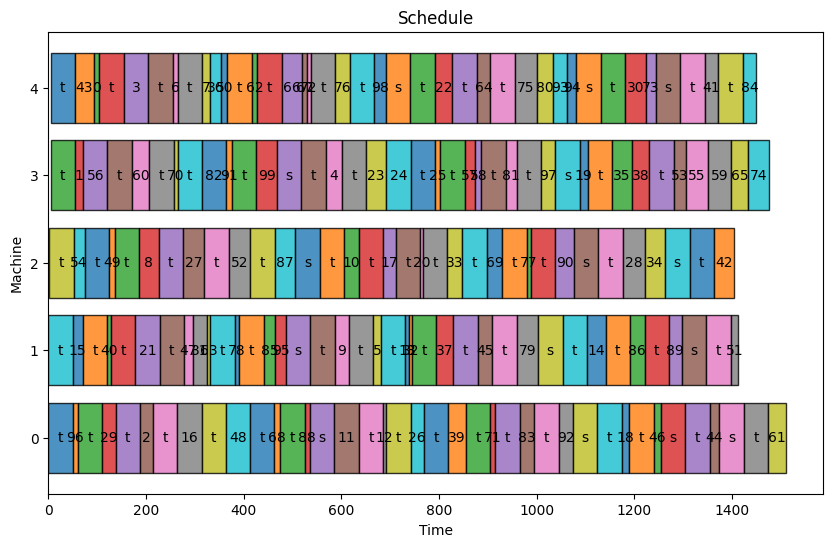

good individual
machine 0: t 96 52 t 78 t 48 t 2 t 85 t 68 t 88 s t 86 t 61 t 14 s t 57 t 73 t 81 t 30 t 25 s 16 t 87 t 47 
machine 1: t 15 t 29 t 21 t 31 t 63 s t 55 t 20 s t 75 t 32 t 71 t 37 t 39 t 13 t 83 t 45 s t 7 t 67 t 62 
machine 2: 54 s t 23 t 46 34 t 18 t 28 t 24 t 58 t 4 97 s t 69 t 10 s 64 t 79 t 11 t 92 s t 8 t 27 40 t 49 
machine 3: t 1 t 60 82 t 99 70 s t 35 74 38 t 90 t 17 t 33 59 77 53 65 19 s t 22 t 9 12 s 89 t 6 36 s t 95 s 91 
machine 4: t 43 t 50 t 3 t 0 72 t 66 t 76 t 98 s t 94 t 5 t 26 t 80 t 93 s t 44 t 41 t 42 t 56 t 84 t 51 
72479


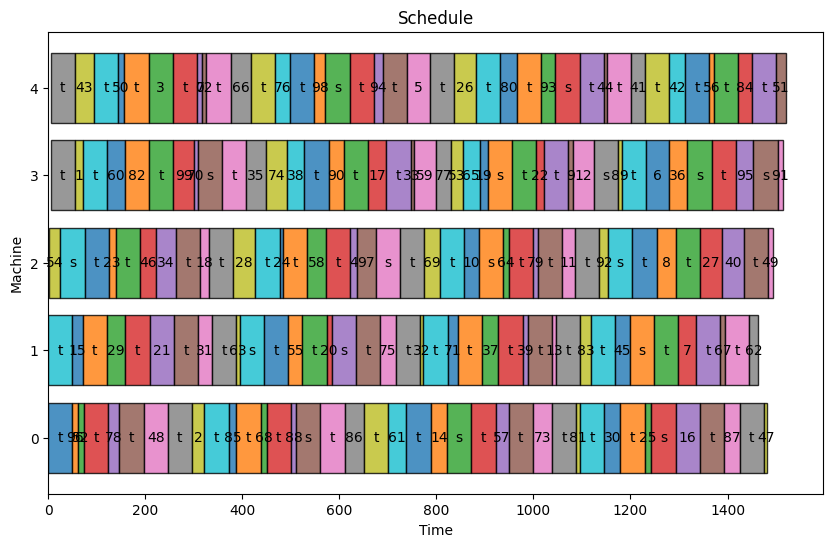

SPT
machine 0: 96 s t 37 t 12 s 50 s t 10 s t 47 s t 66 s t 81 s t 71 s t 88 s t 93 s t 52 s t 45 s t 60 s 26 s t 29 s t 57 s t 65 s 30 s t 74 
machine 1: t 1 s t 32 s t 38 s t 82 s t 40 s t 41 s 13 s t 67 s t 35 s 39 s t 73 s t 36 s t 5 t 80 t 83 s t 84 s t 95 s t 55 s t 86 s t 59 
machine 2: t 43 s t 20 s t 51 s 24 s 77 s t 79 s t 99 s t 4 s t 64 s t 23 s t 85 s 18 s t 92 s t 98 s t 11 s 61 t 76 s t 90 s 34 
machine 3: t 15 s t 89 s t 21 s t 33 s t 94 s t 70 s t 49 t 8 s t 25 s t 91 s t 68 t 2 s t 58 s 14 s t 22 s t 19 t 53 s t 97 s t 48 s 3 
machine 4: t 54 s 46 s t 9 s t 27 s t 44 s t 63 s 72 s t 78 s t 6 s t 56 s t 69 s t 0 t 62 s 17 s t 28 s t 7 s t 31 t 16 t 87 s t 42 s t 75 
95596


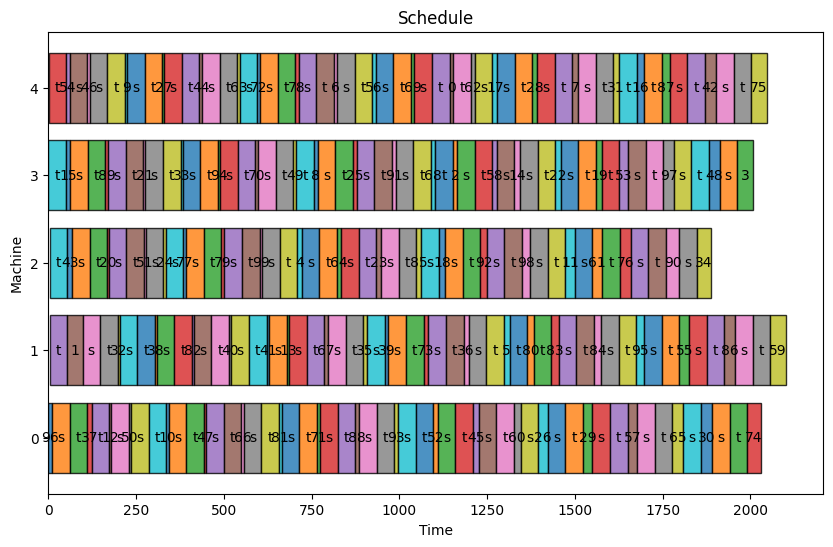

EDD
machine 0: t 87 s t 35 s t 52 s t 38 s t 82 t 60 99 s t 14 s 31 s t 26 s t 78 s t 22 s t 88 s t 33 t 59 s t 56 s t 83 t 92 s t 65 s t 45 
machine 1: t 43 s t 75 s t 86 t 50 3 s t 57 s t 44 s t 66 s t 70 s t 32 t 71 s t 97 s t 89 s t 39 s t 42 s t 81 s t 49 s t 51 s t 47 s t 12 
machine 2: t 54 s t 23 s t 94 s t 61 s t 18 s t 69 s t 28 t 24 s 85 s t 58 s t 80 s t 63 s t 79 t 11 s t 67 s t 27 s t 93 s t 30 
machine 3: t 96 s 55 s 48 t 29 s t 90 s t 21 s t 0 t 76 s t 20 t 17 s t 4 s t 37 s t 1 s 7 s 13 s t 16 s t 77 s t 36 s 91 s 25 s 9 s t 19 
machine 4: t 15 s t 74 s 46 t 34 s t 2 s t 73 s 72 s 5 s t 10 s t 68 s t 98 s t 64 s t 6 s t 41 s t 8 40 t 95 s 53 s t 84 s t 62 
108198


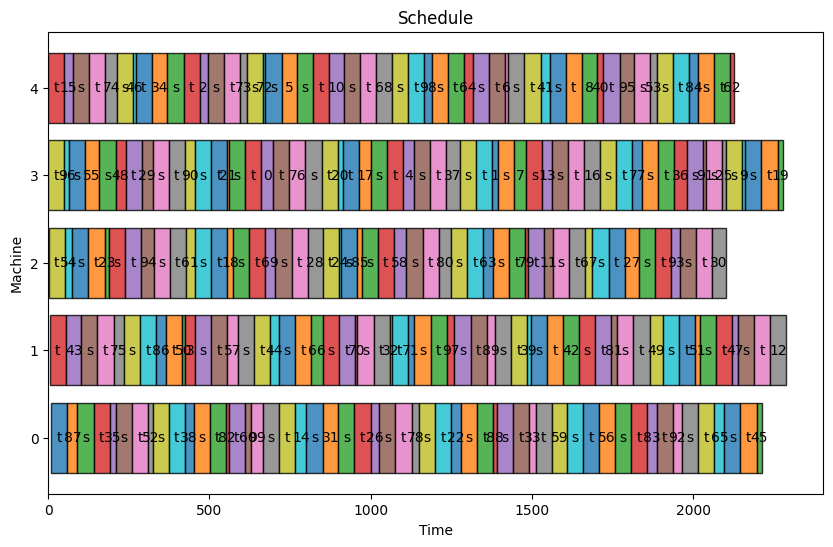

LPT
machine 0: t 87 s t 4 s t 11 s t 16 t 31 t 48 s t 59 s t 13 t 79 s t 84 s t 73 s t 61 s t 39 t 32 s t 53 s t 92 s t 2 t 78 t 85 t 47 s t 50 
machine 1: t 96 s 28 s t 21 s t 12 s 42 s t 65 s t 43 s t 18 t 23 s t 49 s 19 s 14 s 29 s t 77 s t 57 s t 60 s 9 s 44 s t 89 s 81 s 67 
machine 2: t 54 s 45 s t 70 s t 40 27 52 s t 30 s t 72 t 86 s t 83 s t 58 s t 71 s t 97 s t 80 s t 90 s t 94 s 62 s t 46 s 69 t 33 s t 63 
machine 3: t 1 t 56 s t 24 s t 76 s t 82 s t 6 s t 55 s t 37 s t 74 s t 99 s t 35 s t 7 s t 17 s t 36 t 0 s t 38 s t 98 s t 20 
machine 4: t 15 s t 3 s t 34 s t 88 t 68 s t 5 s t 8 s t 10 s t 95 s t 26 t 75 s t 66 s t 22 93 s t 41 s t 64 s t 91 t 51 s t 25 
123389


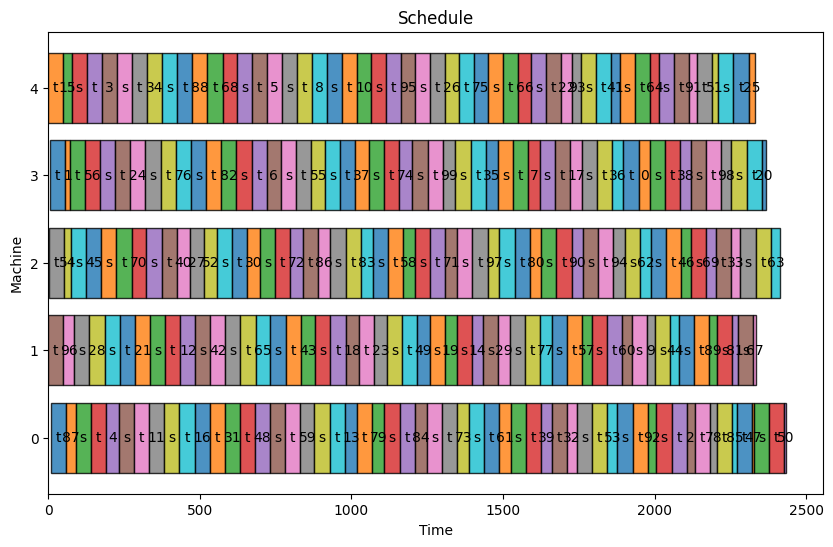

FIFO
machine 0: t 96 87 s t 66 s 4 s t 99 s 13 s 82 s 12 s t 81 s 0 s 88 s t 65 t 69 s t 52 s t 25 s t 44 s t 93 s 14 s t 85 s t 83 s t 86 t 61 
machine 1: t 43 s 37 s 78 s t 34 s t 60 s t 62 s 19 s 97 s t 29 s t 36 89 s t 51 s t 6 s t 39 s 18 s t 47 s t 9 s t 31 27 s 77 s t 75 
machine 2: t 54 s t 23 s t 45 s t 10 s t 58 s t 17 s t 79 t 92 t 71 s t 63 s 20 s t 72 s t 8 s t 70 s t 94 s t 67 s t 80 
machine 3: t 1 s t 49 s t 59 s t 7 s t 24 s t 74 t 53 s t 3 s t 57 s t 68 s t 55 s t 16 s t 33 t 35 s t 48 s t 38 s 11 
machine 4: t 15 s 26 s 73 s 50 98 s 46 s t 90 s t 41 s 22 s t 40 s t 91 s 32 t 64 s t 84 t 56 s t 5 s 28 s 95 s t 76 s 42 s 2 s 30 s t 21 
100796


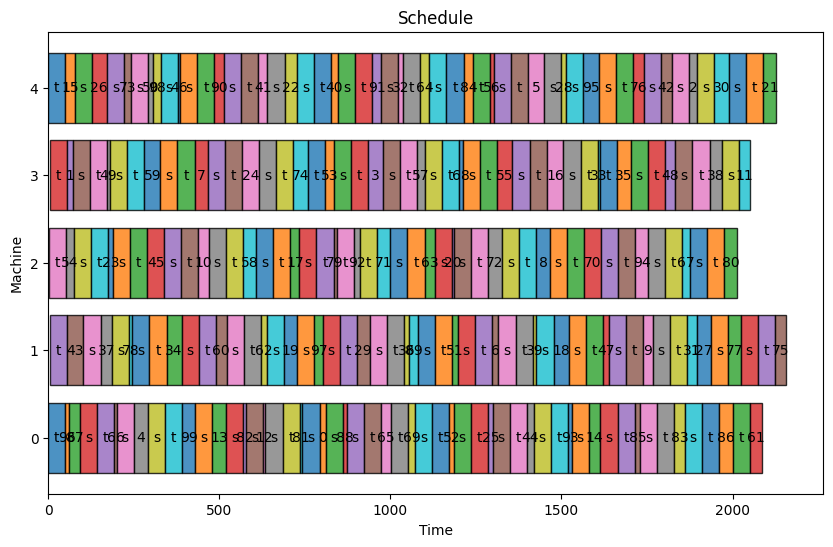

CR
machine 0: 96 s 37 s t 55 s t 48 s t 13 t 22 t 26 s t 29 s 38 s t 39 s 46 s t 50 s t 52 s t 60 s t 65 s 71 s 78 s t 79 s t 82 s t 87 s t 99 
machine 1: t 15 s t 3 6 s t 9 t 12 s t 19 s t 27 31 s t 34 s 42 44 s t 47 s t 57 s t 59 s t 67 s t 70 s t 75 s t 81 s t 86 s t 91 
machine 2: t 54 t 8 s t 4 s t 10 s t 18 t 23 t 28 s t 33 s t 40 s t 45 t 94 s t 58 s t 64 s t 69 s t 76 s t 83 s t 85 s t 92 s t 97 
machine 3: t 1 s t 0 t 7 s 11 s t 14 s 20 s t 24 s 35 s t 36 s t 49 s t 53 s t 56 s t 61 s t 68 s t 72 s t 77 s t 89 s t 90 s t 95 
machine 4: 43 s t 17 s t 2 s 5 s t 16 21 s t 25 t 30 s t 32 s t 41 s t 74 s 51 s t 62 s t 63 s t 66 s t 73 s t 80 s t 84 s 88 s 93 s t 98 
104410


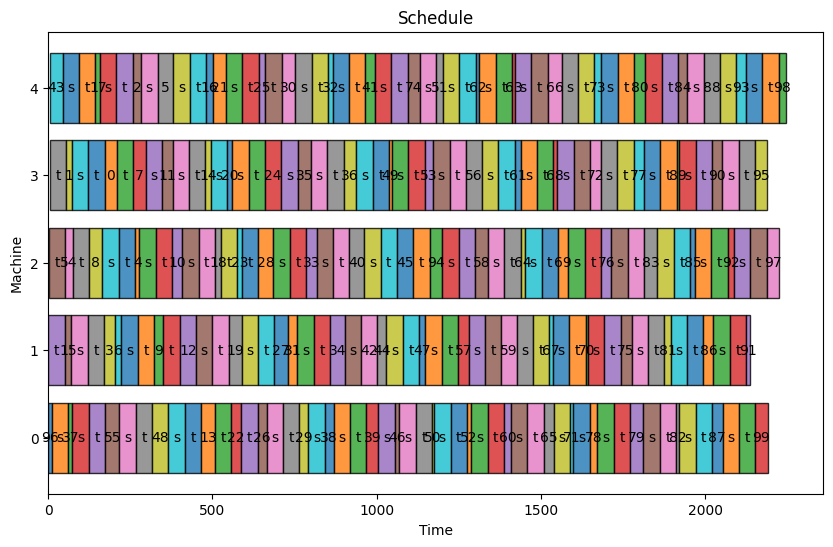

CO
machine 0: t 96 s t 0 s t 11 t 13 s t 16 s t 24 s t 31 s t 39 t 45 s 52 s t 55 s 60 s t 66 s t 71 s t 78 s t 82 s t 86 s t 92 
machine 1: 15 s 7 s t 9 s t 6 s 18 s 19 s 27 t 29 s t 32 s 38 s t 41 t 44 t 51 s t 57 s t 63 s t 70 s 75 s t 77 s t 83 s 91 s t 95 s t 97 
machine 2: t 54 s t 10 s 8 s t 4 s t 20 s 23 t 28 s 33 s 40 s t 42 s 47 t 49 s 58 s 61 s t 64 s t 69 s t 76 s 79 s t 85 t 87 s 93 s t 99 
machine 3: t 1 s t 3 s t 94 t 12 s 14 s t 22 t 26 s t 35 s t 37 s t 48 s t 53 t 59 t 65 s t 68 s t 74 s t 81 s t 89 s t 90 
machine 4: t 43 s 2 s t 5 s t 17 s t 21 s 25 t 30 34 s t 36 s t 46 s t 50 s t 56 s t 62 t 67 t 72 s t 73 s t 80 s t 84 s t 88 s 98 
101442


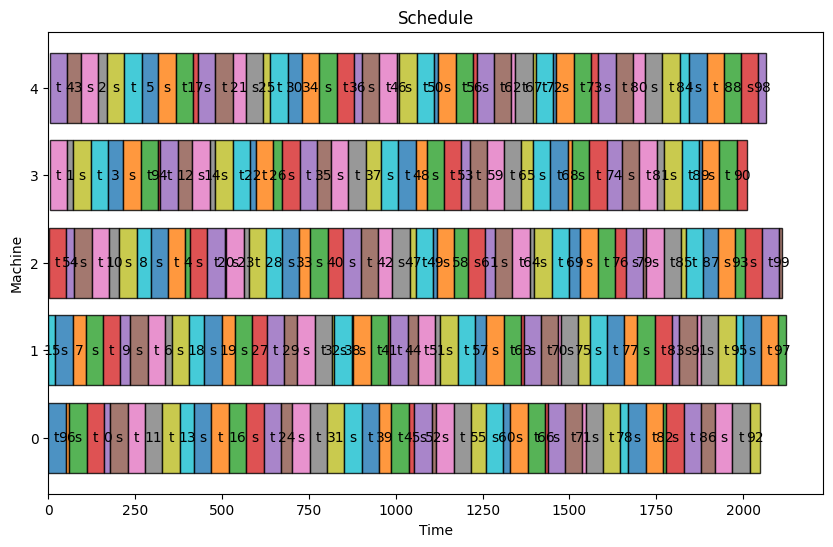

GP 69875.8
SPT 89653.36666666667
LPT 120482.36666666667
EDD 105437.5
FIFO 105690.6
CR 105121.7
CO 103175.7


In [16]:
  # @title 최종 GP 실행
import sys
sys.setrecursionlimit(10**5)

base_path = '/content/data_train/5x100x6/5x100x6_%d.pickle'

num_iteration = 5
num_population = 50
num_parent = 48
num_child = 24
num_tournament = 1
percentage_mutation = 0.3
population = []
tardiness_list = []
min_depth = 1
max_depth = 10
mutation_minimum, mutation_maximum = 1, 3
terminal_node_list = ['machine_available_time', 'job_prts_at_machine', 'job_due', 'is_there_setup']
function_node_list = ['+', '-', '*']


if __name__ == "__main__":
    # 초기 population 생성
    population = making_random_population(terminal_node_list, function_node_list, min_depth, max_depth, num_population)
    # iteration 수 만큼 시뮬레이터 실행 + evolution
    for i in range(num_iteration):
        next_population = []
        # 문제 변경 (train data 변경)
        problem_path = base_path % i
        with open(problem_path, 'rb') as fr:
            problem = pickle.load(fr)
        tardiness_list = []
        # 모든 individual에 대해 시뮬레이션 후 tardiness list 획득
        for individual in population:
            tardiness_list.append(run_the_simulator(problem, individual)) # total tardiness를 리턴하도록 변경
        print(i)
        print('++++++++++++++++++++++++++++++++++++++++++++++++++++')
        # elitism
        first_elite = np.argmin(tardiness_list)
        first_elite_tardiness = tardiness_list[first_elite]
        #print_tree(population[first_elite])
        #print(first_elite_tardiness)
        tardiness_list[first_elite] = math.inf
        second_elite = np.argmin(tardiness_list)
        tardiness_list[first_elite] = first_elite_tardiness
        next_population.append(copy_tree(population[first_elite]))
        next_population.append(copy_tree(population[second_elite]))

        # parent selction with tournament k=7
        selected_parent = []
        parent_indices = []
        for _ in range(num_parent):
            tournament_candidates = random.sample(list(zip(population, tardiness_list)), num_tournament)
            selected_parent.append(copy_tree(min(tournament_candidates, key=lambda x: x[1])[0]))
        #for tt in range(28):
            #print_tree(selected_parent[tt])
            #print('!!!!!!!!!!!!!!!!!!!!!!!!1')

        # mutation + crossover
        first_parent = None
        second_parent = None
        for klkl in range(num_child):
            child1 = None
            child2 = None
            first_parent = selected_parent[random.randint(0, num_parent-1)]
            second_parent = selected_parent[random.randint(0, num_parent-1)]
            #print("~~~~~~~~parent~~~~~~~~")
            #print_tree(first_parent)
            #print_tree(second_parent)
            #print("~~~~~~~~parent~~~~~~~~")
            if random.random() <= percentage_mutation:
              #print('I did mutation!!!')
              child1 = mutation(first_parent, terminal_node_list, function_node_list, mutation_minimum, mutation_maximum)
              child2 = mutation(second_parent, terminal_node_list, function_node_list, mutation_minimum, mutation_maximum)
            else:
              #print('I did crossover')
              child1, child2 = crossover(first_parent, second_parent)
            #if i==1:
                #print_tree(child1)
                #print("!!!!!!")
                #print_tree(child2)
                #print("!@!!@!@!@!@!@!@!@!!@!@!@!@!@!!@!@!@!!@")
            next_population.append(child1)
            next_population.append(child2)
            #print("~~~~~~~~child~~~~~~~~")
            #print_tree(first_parent)
            #print_tree(second_parent)
            #print("~~~~~~~~child~~~~~~~~")

        population = next_population

        #if i <= 9:
            #for individual in population:
                #print_tree(individual)
                #print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')



    problem_path = '/content/data_train/5x100x6/5x100x6_77.pickle'
    with open(problem_path, 'rb') as fr:
        problem = pickle.load(fr)
    tardiness_list = []
    for individual in population:
        #print_tree(individual)
        #print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
        tardiness_list.append(run_the_simulator(problem, individual)) # total tardiness를 리턴하도록 변경


    best_individual_index = np.argmin(tardiness_list)
    best_individual = population[best_individual_index]
    print_tree(best_individual)
    problem_path = '/content/data_train/5x100x6/5x100x6_77.pickle'
    with open(problem_path, 'rb') as fr:
        problem = pickle.load(fr)
    root = Treenode('-', None, 1)
    left_child = Treenode('job_due', root, 2)
    right_child = Treenode('is_there_setup', root, 2)
    root.left = left_child
    root.right = right_child
    run_the_simulator_last(problem, best_individual) # last는 스케쥴까지 출력 + tardiness 출력
    print('good individual')
    run_the_simulator_last(problem, root)
    print('SPT')
    run_the_simulator_last(problem, 'SPT')
    print('EDD')
    run_the_simulator_last(problem, 'EDD')
    print('LPT')
    run_the_simulator_last(problem, 'LPT')
    print('FIFO')
    run_the_simulator_last(problem, 'FIFO')
    print('CR')
    run_the_simulator_last(problem, 'CR')
    print('CO')
    run_the_simulator_last(problem, 'CO')

    total_dict = {
        'GP':[],
        'SPT':[],
        'LPT':[],
        'EDD':[],
        'FIFO':[],
        'CR':[],
        'CO':[]
    }
    for iteration in range(30):
        iteration += 80
        problem_path = base_path % iteration
        with open(problem_path, 'rb') as fr:
            problem = pickle.load(fr)
        tardiness_list = []
        for individual in population:
            tardiness_list.append(run_the_simulator(problem, individual)) # total tardiness를 리턴하도록 변경
        best_individual_index = np.argmin(tardiness_list)
        best_individual = population[best_individual_index]
        total_dict['GP'].append(run_the_simulator(problem, best_individual))
        total_dict['SPT'].append(run_the_simulator(problem, 'SPT'))
        total_dict['LPT'].append(run_the_simulator(problem, 'LPT'))
        total_dict['EDD'].append(run_the_simulator(problem, 'EDD'))
        total_dict['FIFO'].append(run_the_simulator(problem, 'FIFO'))
        total_dict['CR'].append(run_the_simulator(problem, 'CR'))
        total_dict['CO'].append(run_the_simulator(problem, 'CO'))
    print('GP', np.mean(total_dict['GP']))
    print('SPT', np.mean(total_dict['SPT']))
    print('LPT', np.mean(total_dict['LPT']))
    print('EDD', np.mean(total_dict['EDD']))
    print('FIFO', np.mean(total_dict['FIFO']))
    print('CR', np.mean(total_dict['CR']))
    print('CO', np.mean(total_dict['CO']))

# 리소스를 machine eligibility 형식으로 바꾸기
# 다양한 룰 적용해서 표 형식으로 결과 비교하기
# 논문에 나온 데이터 분포 및 노드 종류들을 활용해서 실험해보기

# job shop으로 구현해보기